# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [203]:
# modules used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [204]:
df = pd.read_csv('RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


### sample

In [205]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
277,18:40:00,Tuesday,18-30,Male,Junior high school,Employee,2-5yr,Stationwagen,NaN,2-5yrs,...,Going straight,Pedestrian,Male,Under 18,3,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
10516,4:00:00,Friday,18-30,Male,Elementary school,Employee,Below 1yr,Public (12 seats),Owner,2-5yrs,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
7816,17:30:00,Sunday,18-30,Male,Junior high school,Employee,1-2yr,NaN,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
7080,14:35:00,Friday,31-50,Male,Junior high school,Employee,2-5yr,Long lorry,Owner,Unknown,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
11967,18:00:00,Friday,31-50,Male,Junior high school,Employee,1-2yr,Pick up upto 10Q,Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
252,15:00:00,Thursday,18-30,Male,Elementary school,Employee,5-10yr,Long lorry,Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,2,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
10260,15:36:00,Tuesday,31-50,Male,Junior high school,Employee,Above 10yr,Public (12 seats),NaN,NaN,...,Reversing,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
11988,14:29:00,Saturday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (41?100Q),Owner,5-10yrs,...,Going straight,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5457,8:50:00,Tuesday,31-50,Male,Elementary school,Employee,Below 1yr,Automobile,Owner,NaN,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
7273,8:35:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Public (13?45 seats),Owner,Unknown,...,Reversing,Passenger,Female,18-30,3,Driver,Normal,Not a Pedestrian,Turnover,Slight Injury


# check for duplicates in the dataset

In [206]:

df.duplicated().sum()

0

### nulls values in the dataset


In [207]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

## columns will be dropped


In [209]:
df = df.drop(['Fitness_of_casuality', 'Work_of_casuality', 
              'Vehicle_driver_relation', 'Owner_of_vehicle',
              'Service_year_of_vehicle', 'Educational_level'],axis=1)


### summary statistics


In [211]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


# we will extract the hour from the time because it's the only useful information

In [ ]:

df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
# we will drop the time column
df = df.drop(['Time'], axis=1)

### na values in the 'Casualty_severity' column will be converted to null


In [ ]:
df['Casualty_severity'] = df['Casualty_severity'].replace('na', np.nan)

# categorical columns

In [1]:
cat_columns = df[['Driving_experience', 'Type_of_vehicle', 'Defect_of_vehicle',
                 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 
                 'Types_of_Junction', 'Road_surface_type', 'Vehicle_movement',
                 'Casualty_severity', 'Type_of_collision']]



NameError: name 'df' is not defined

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [214]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df[cat_columns.columns])
df[cat_columns.columns] = imputer.transform(df[cat_columns.columns])

In [216]:
# convert Driving_experience to numerical
df['Driving_experience'] = df['Driving_experience'].replace({
    'No Licence': 0,
    'unknown': 0,
    'Below 1yr': 1,
    '1-2yr': 2,
    '2-5yr': 5,
    '5-10yr': 8,
    'Above 10yr': 13
}).astype('Int64')

/var/folders/6g/5pq4j4kn1ng2t80r1jn1jjrw0000gn/T/ipykernel_6499/3118707730.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [217]:

onehot_cols_df = df[[
    'Sex_of_driver', 'Type_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured',
    'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
    'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision',
    'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty',
    'Pedestrian_movement', 'Cause_of_accident', 'Day_of_week', 'Age_band_of_driver'
]]
rest_cols_df = df.drop(onehot_cols_df.columns, axis=1)
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(onehot_cols_df)
df_cat_1hot = pd.DataFrame(df_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out(onehot_cols_df.columns))
df_encoded = pd.concat([df, df_cat_1hot], axis=1)
df_encoded = df_encoded.drop(onehot_cols_df.columns, axis=1)

In [218]:
c_df = pd.concat([df_encoded, df], axis=1)

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

<Axes: xlabel='Area_accident_occured'>

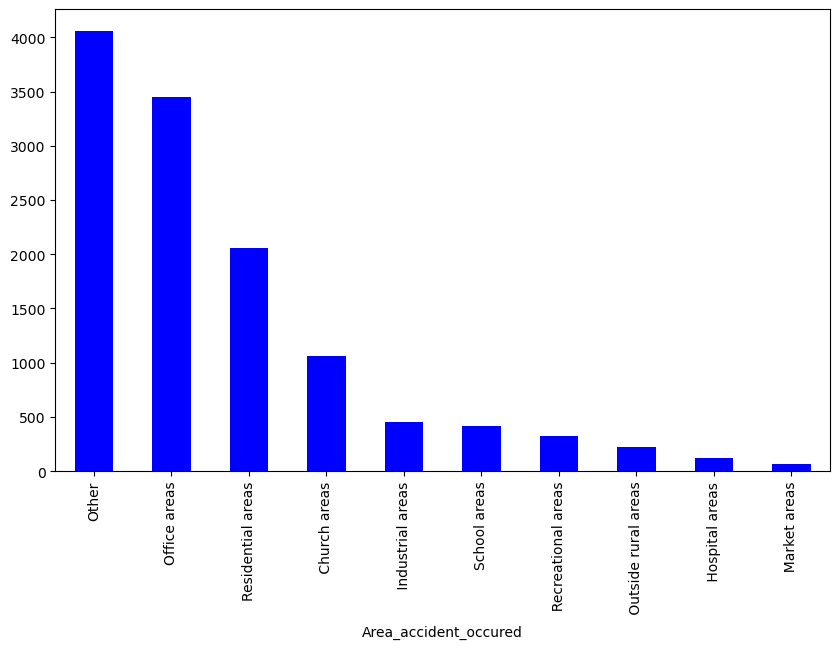

In [219]:
# top Areas were accidents occured
df['Area_accident_occured'].value_counts().head(10).plot(kind='bar', color='blue', figsize=(10, 6))

<Axes: ylabel='count'>

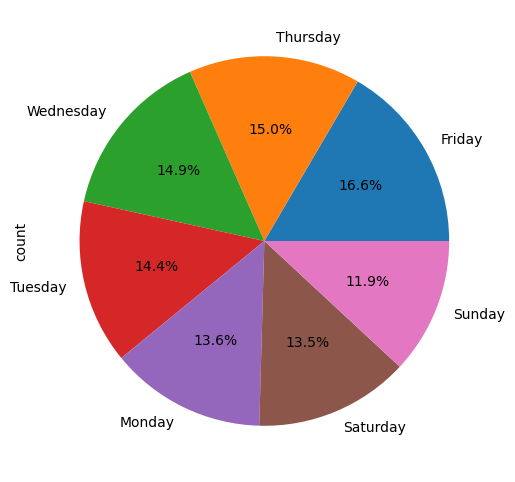

In [220]:
# pie chart to show the percentage of accidents that occured in a particular day of the week
df['Day_of_week'].value_counts().head(7).plot(kind='pie', autopct='%1.1f%%', figsize=(10, 6))

In [221]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df['Cause_of_accident'].value_counts().head(10).index,
                     y=df['Cause_of_accident'].value_counts().head(10).values,
                     name='Cause of Accident',
                     marker_color='green'))

fig.add_trace(go.Bar(x=df['Accident_severity'].value_counts().head(10).index,
                     y=df['Accident_severity'].value_counts().head(10).values,
                     name='Accident Severity',
                     marker_color='red'))

fig.update_layout(barmode='group')
fig.show()


<Axes: >

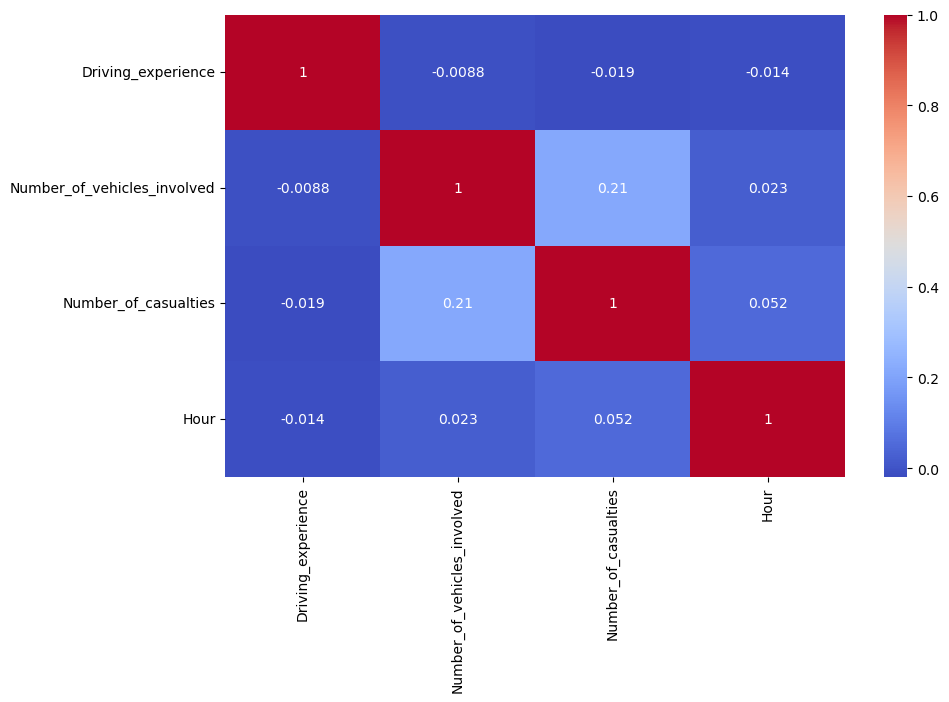

In [222]:
# correlation matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")

<Axes: >

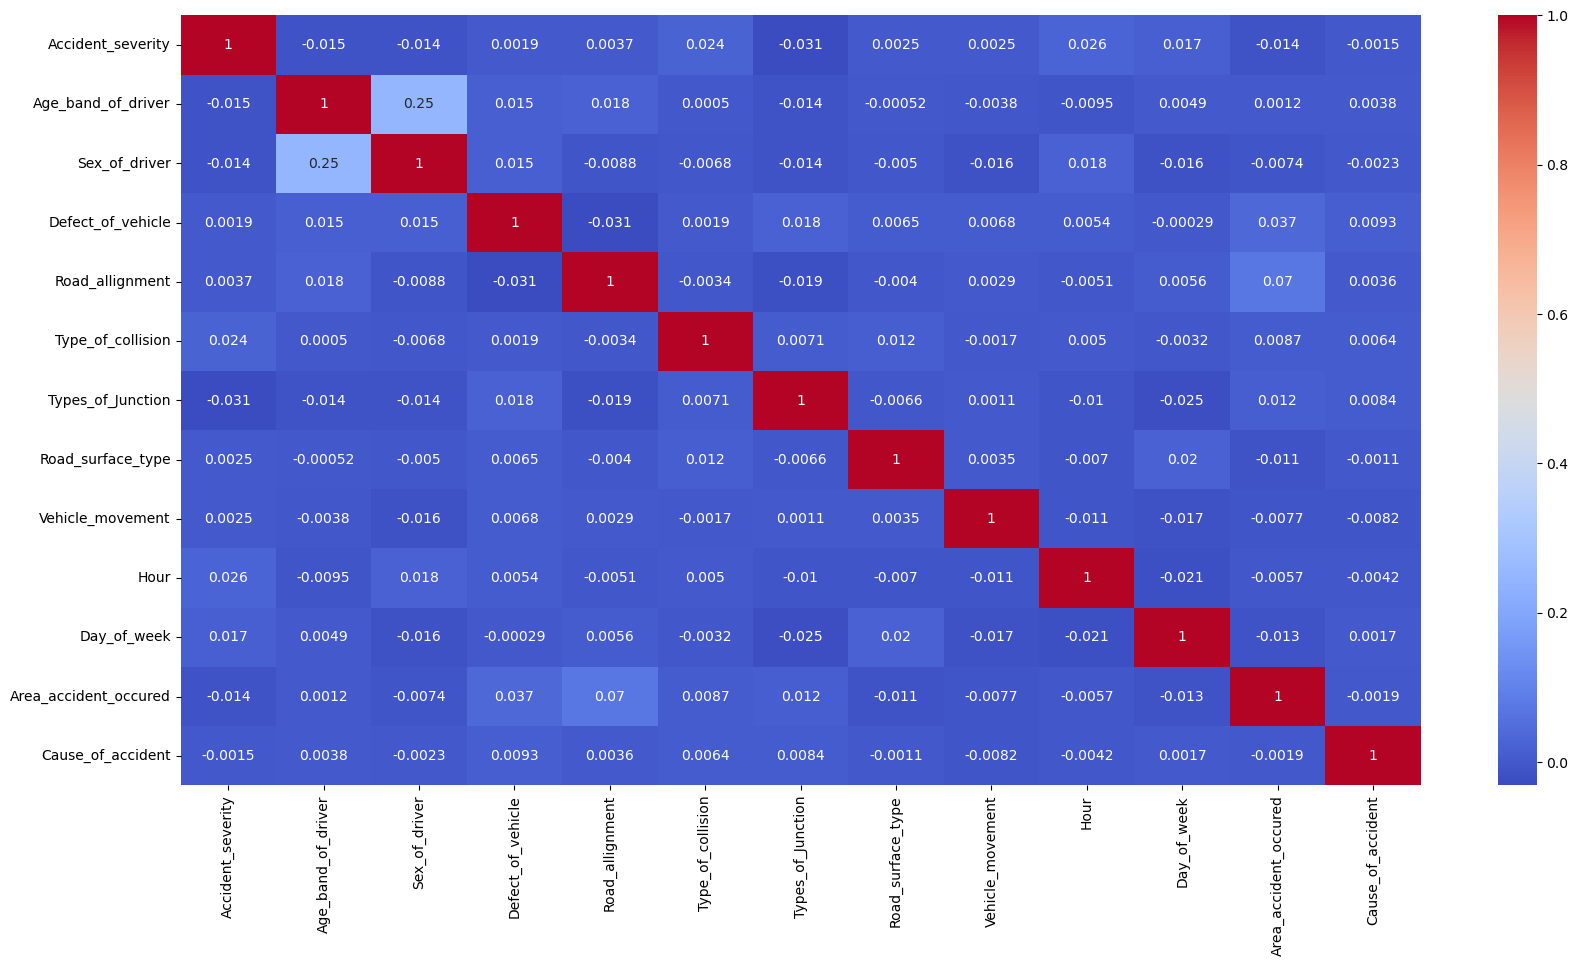

In [223]:
cat_columns = ['Accident_severity', 'Age_band_of_driver', 'Sex_of_driver', 'Defect_of_vehicle',
               'Road_allignment', 'Type_of_collision',  
               'Types_of_Junction', 'Road_surface_type', 'Vehicle_movement', 'Hour', 'Day_of_week', 'Area_accident_occured', 'Cause_of_accident'] 
plt.figure(figsize=(20,10))
sns.heatmap(df[cat_columns].apply(lambda x : pd.factorize(x)[0]).corr(),annot=True,cmap="coolwarm")

In [224]:
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Driving_experience           12316 non-null  Int64 
 4   Type_of_vehicle              12316 non-null  object
 5   Defect_of_vehicle            12316 non-null  object
 6   Area_accident_occured        12316 non-null  object
 7   Lanes_or_Medians             12316 non-null  object
 8   Road_allignment              12316 non-null  object
 9   Types_of_Junction            12316 non-null  object
 10  Road_surface_type            12316 non-null  object
 11  Road_surface_conditions      12316 non-null  object
 12  Light_conditions             12316 non-null  object
 13  Weather_conditions           12

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [226]:
# split the data into training and testing sets
X = df_encoded.drop('Accident_severity', axis=1)
y = df_encoded['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [227]:
# Encoding the y_train and y_test
ord_encoder = OrdinalEncoder()
y_train = ord_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = ord_encoder.transform(y_test.values.reshape(-1, 1))



## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)
accuracy = log_reg.score(X_test, y_test)
print(f'Logistic Regression Accuracy: {accuracy}')


#### Decision Tree Classifier

In [229]:
# Decision Tree classifier
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)
accuracy = dt.score(X_test, y_test)
print(f'Decision Tree Accuracy: {accuracy}')


Decision Tree Accuracy: -0.6263112808774172


#### Support Vector Machine (SVM)

In [230]:
# support vector machine
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)
accuracy = svc.score(X_test, y_test)
print(f'Support Vector Machine Accuracy: {accuracy}')

/Users/tariq_assan/miniconda3/envs/pydata-book/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Support Vector Machine Accuracy: 0.8376623376623377


#### K-Neighbors Classifier

In [231]:
# K-Nearest Neighbors

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
accuracy = knn.score(X_test, y_test)
print(f'K-Nearest Neighbors Accuracy: {accuracy}')

/Users/tariq_assan/miniconda3/envs/pydata-book/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



K-Nearest Neighbors Accuracy: 0.8275162337662337


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [232]:
# Confusion Matrix
y_pred = log_reg.predict(X_test)
confusion_matrix(y_test, y_pred)


TypeError: can't multiply sequence by non-int of type 'float'

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: